# 6.1 MNIST 학습하기

머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.

In [2]:
import tensorflow as tf

## MNIST 데이터셋 import

http://yann.lecun.com/exdb/mnist/ 에서 데이터셋을 받을 수 있는데 텐서플로에서는 바로 분석에 사용할 수 있는 형태로 정리된 데이터를 제공

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


+ 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.

+ 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.

+ one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.

## 신경망 모델 구성

**미니배치(minibatch)** : 데이터를 적당한 크기로 잘라 학습시킴

+ 플레이스 홀더에 배치 크기를 직접 정해줘도 되지만 None으로 넣어주면 텐서플로가 알아서 계산

In [5]:
X = tf.placeholder(tf.float32, [None, 784])

+ 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.

+ 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784(28x28)개의 특성값으로 정합니다.

In [6]:
Y = tf.placeholder(tf.float32, [None, 10])

+ 결과는 0~9의 10 가지 분류를 가집니다. => 숫자가 0~9까지 있음

784(feature 개수) -> 256(첫 번째 은닉층 뉴런 개수) 

-> 256(두 번째 은닉층 뉴런 개수) -> 10(출력값, 0~9)

In [8]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

## 신경망 모델 학습

+ **에포크(epoch)** : 학습 데이터 전체를 한 바퀴 도는 것

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.403
Epoch: 0002 Avg. cost = 0.148
Epoch: 0003 Avg. cost = 0.098
Epoch: 0004 Avg. cost = 0.070
Epoch: 0005 Avg. cost = 0.052
Epoch: 0006 Avg. cost = 0.041
Epoch: 0007 Avg. cost = 0.031
Epoch: 0008 Avg. cost = 0.026
Epoch: 0009 Avg. cost = 0.023
Epoch: 0010 Avg. cost = 0.019
Epoch: 0011 Avg. cost = 0.016
Epoch: 0012 Avg. cost = 0.013
Epoch: 0013 Avg. cost = 0.011
Epoch: 0014 Avg. cost = 0.014
Epoch: 0015 Avg. cost = 0.011
최적화 완료!


## 결과 확인

학습이 잘 되었는지 확인할 때는 테스트 데이터를 사용

In [11]:
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

정확도: 0.9794


+ argmax(A, 1) : A의 두 번째 차원(1번 인덱스의 차원)의 값 중 최댓값의 인덱스를 뽑아냄

+ tf.equal(A, B): A와 B가 같은지 확인

In [12]:
sess.run(is_correct, feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels})

array([ True,  True,  True, ...,  True,  True,  True])

+ tf.cast(A, tf.float32): A를 0과 1로 변환

In [13]:
sess.run(tf.cast(is_correct, tf.float32), feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels})

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

만약 정확도 평가를 할 때 훈련 데이터를 사용한다면?

In [14]:
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.train.images,
                                   Y: mnist.train.labels}))

정확도: 0.9972


+ 거의 1에 가까운 값이 나옴. 과적합이 발생

# 6.2 드롭아웃

+ 과적합을 해결하기 위한 방법 중 하나

+ 학습 시 전체 신경망 중 일부만을 사용하도록 하는 것

+ 학습 단계마다 일부 뉴런을 제거함으로써, 일부 특징이 특정 뉴런들에 고정되는 것을 막아 가중치의 균형을 잡도록 하여 과적합 방지

+ 학습 시 일부 뉴런을 학습시키지 않기 때문에 신경망이 충분히 학습되기까지의 시간이 조금 더 오래 걸림

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## 신경망 모델 구성

In [17]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

+ 드롭아웃 기법을 사용해서 학습을 한 후에 예측을 할 때는 다시 전체 뉴런을 사용해야 함

+ 이를 위해 keep_prob이라는 플레이스홀더를 만들어줌

+ 학습 시에는 0.8, 예측 시에는 1을 넣어 사용

In [18]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



## 신경망 모델 학습

In [19]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(10):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.421
Epoch: 0002 Avg. cost = 0.163
Epoch: 0003 Avg. cost = 0.113
Epoch: 0004 Avg. cost = 0.089
Epoch: 0005 Avg. cost = 0.072
Epoch: 0006 Avg. cost = 0.060
Epoch: 0007 Avg. cost = 0.052
Epoch: 0008 Avg. cost = 0.045
Epoch: 0009 Avg. cost = 0.040
Epoch: 0010 Avg. cost = 0.037
최적화 완료!


## 결과 확인

In [20]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

정확도: 0.9799


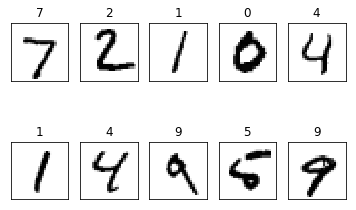

In [21]:
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

## 배치 정규화(Batch Normalization)

+ 최근에 많이 사용하는 과적합 방지 기법

+ 과적합을 막아줄 뿐 아니라 학습 속도도 향상시켜 줌

+ 원래 과적합 문제보다는 학습 시 발산이나 소실 등을 방지하여 학습 속도를 높이기 위해 만들어 짐

+ [배치 정규화 설명 및 구현](https://shuuki4.wordpress.com/2016/01/13/batch-normalization-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EA%B5%AC%ED%98%84/)

In [22]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool, name='is_training')

In [23]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.layers.batch_normalization(L1, training=is_training)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L1 = tf.layers.batch_normalization(L2, training=is_training)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [24]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(10):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          is_training : 1})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.240
Epoch: 0002 Avg. cost = 0.090
Epoch: 0003 Avg. cost = 0.062
Epoch: 0004 Avg. cost = 0.048
Epoch: 0005 Avg. cost = 0.038
Epoch: 0006 Avg. cost = 0.031
Epoch: 0007 Avg. cost = 0.026
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.022
Epoch: 0010 Avg. cost = 0.022
최적화 완료!


In [25]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도(test set):', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   is_training: 0}))
print('정확도(training set):', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   is_training: 1}))

정확도(test set): 0.7519
정확도(training set): 0.9817
